<a href="https://colab.research.google.com/github/anastefan176/ULEZ/blob/main/Diff_in_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

pylab.rcParams['figure.figsize'] = (10., 8.)

In [2]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('LaqnData (2).csv')
data.head()

Saving LaqnData (2).csv to LaqnData (2).csv


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HR1,NO2,01/01/2020 00:00,33.6,ug m-3,R
1,HR1,NO2,02/01/2020 00:00,15.9,ug m-3,R
2,HR1,NO2,03/01/2020 00:00,13.2,ug m-3,R
3,HR1,NO2,04/01/2020 00:00,19.7,ug m-3,R
4,HR1,NO2,05/01/2020 00:00,14.1,ug m-3,R


In [3]:
data = pd.read_csv('LaqnData (2).csv')
data.columns = ["site", "pollutant", "datetime", "Value", "Units", "status"]

data["datetime"] = pd.to_datetime(data["datetime"], dayfirst=True, errors="coerce")

data = data.dropna(subset=["datetime", "Value"])

data = data[data["status"] == "R"]

data["Value"] = pd.to_numeric(data["Value"], errors="coerce")

data = data[(data["Value"] >= 0) & (data["Value"] <= 200)]

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6330 entries, 0 to 10961
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   site       6330 non-null   object        
 1   pollutant  6330 non-null   object        
 2   datetime   6330 non-null   datetime64[ns]
 3   Value      6330 non-null   float64       
 4   Units      6330 non-null   object        
 5   status     6330 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 346.2+ KB
None


,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [4]:
from google.colab import files
uploaded = files.upload()

data2 = pd.read_csv('LaqnData (3).csv')
data.head()

Saving LaqnData (3).csv to LaqnData (3).csv


,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [5]:
data2 = pd.read_csv('LaqnData (3).csv')



data2.columns = ["site", "pollutant", "datetime", "Value", "Units", "status"]
data2["datetime"] = pd.to_datetime(data2["datetime"], dayfirst=True, errors="coerce")
data2 = data2.dropna(subset=["datetime", "Value"])
data2 = data2[data2["status"] == "R"]
data2["Value"] = pd.to_numeric(data2["Value"], errors="coerce")
data2 = data2[(data2["Value"] >= 0) & (data2["Value"] <= 200)]

print("Second file (data2) after cleaning:")
print(data2.info())
data2.head()

Second file (data2) after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 6646 entries, 0 to 9864
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   site       6646 non-null   object        
 1   pollutant  6646 non-null   object        
 2   datetime   6646 non-null   datetime64[ns]
 3   Value      6646 non-null   float64       
 4   Units      6646 non-null   object        
 5   status     6646 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 363.5+ KB
None


,site,pollutant,datetime,Value,Units,status
0,MY1,NO2,2020-01-01,51.3,ug m-3,R
1,MY1,NO2,2020-01-02,51.5,ug m-3,R
2,MY1,NO2,2020-01-03,43.1,ug m-3,R
3,MY1,NO2,2020-01-04,60.5,ug m-3,R
4,MY1,NO2,2020-01-05,57.1,ug m-3,R


In [6]:
combined = pd.concat([data, data2], ignore_index=True)

In [7]:
combined.shape
combined.head()

,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [8]:
combined["site"].unique()

array(['HR1', 'HV1', 'ST4', 'LB4', 'MY1', 'BG2', 'BL0', 'TH2', 'BX1'],
      dtype=object)

In [9]:
print("data sites:", data["site"].unique())
print("data2 sites:", data2["site"].unique())

data sites: ['HR1' 'HV1' 'ST4' 'LB4']
data2 sites: ['MY1' 'BG2' 'BL0' 'TH2' 'BX1']


In [10]:
ulez_map = {
    "LB4": "Inside ULEZ",
    "BL0": "Inside ULEZ",
    "MY1": "Inside ULEZ",
    "TH2": "Inside ULEZ",
    "BX1": "Inside ULEZ",

    "ST4": "Outside ULEZ",
    "HR1": "Outside ULEZ",
    "HV1": "Outside ULEZ",
    "BG2": "Outside ULEZ",

}
combined["zone"] = combined["site"].map(ulez_map)

In [11]:
combined[["site", "zone"]].drop_duplicates()

,site,zone
0,HR1,Outside ULEZ
1168,HV1,Outside ULEZ
2980,ST4,Outside ULEZ
4526,LB4,Inside ULEZ
6330,MY1,Inside ULEZ
7727,BG2,Outside ULEZ
9450,BL0,Inside ULEZ
10487,TH2,Inside ULEZ
12278,BX1,Inside ULEZ


In [12]:
combined['treated'] = (combined['zone'] == 'Inside ULEZ').astype(int)


combined['year'] = combined['datetime'].dt.year


combined['post'] = (combined['year'] >= 2023).astype(int)


combined['treated_post'] = combined['treated'] * combined['post']

combined[['site', 'zone', 'treated', 'post']].drop_duplicates()

,site,zone,treated,post
0,HR1,Outside ULEZ,0,0
991,HR1,Outside ULEZ,0,1
1168,HV1,Outside ULEZ,0,0
2256,HV1,Outside ULEZ,0,1
2980,ST4,Outside ULEZ,0,0
4009,ST4,Outside ULEZ,0,1
4526,LB4,Inside ULEZ,1,0
5603,LB4,Inside ULEZ,1,1
6330,MY1,Inside ULEZ,1,0
7381,MY1,Inside ULEZ,1,1


In [13]:
yearly = (
    combined
    .groupby(['site', 'treated', 'year', 'post'])['Value']
    .mean()
    .reset_index()
)

yearly.head()

,site,treated,year,post,Value
0,BG2,0,2020,0,20.189779
1,BG2,0,2021,0,20.405556
2,BG2,0,2022,0,20.590959
3,BG2,0,2023,1,18.436544
4,BG2,0,2024,1,18.188372


In [14]:
pre_trends = (
    yearly[yearly['year'] < 2023]
    .groupby(['treated', 'year'])['Value']
    .mean()
    .reset_index()
)

pre_trends

,treated,year,Value
0,0,2020,24.709306
1,0,2021,25.660174
2,0,2022,25.817780
3,1,2020,35.306964
4,1,2021,34.683831
5,1,2022,38.791275


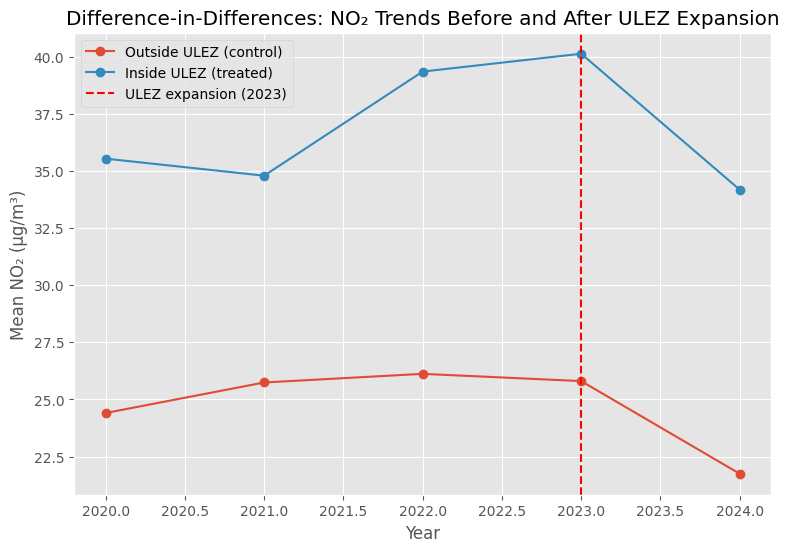

In [15]:

did_plot = (
    combined
    .groupby(['treated', 'year'])['Value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,6))

for treated, g in did_plot.groupby('treated'):
    label = 'Inside ULEZ (treated)' if treated == 1 else 'Outside ULEZ (control)'
    plt.plot(g['year'], g['Value'], marker='o', label=label)


plt.axvline(2023, color='red', linestyle='--', label='ULEZ expansion (2023)')

plt.xlabel('Year')
plt.ylabel('Mean NO₂ (µg/m³)')
plt.title('Difference-in-Differences: NO₂ Trends Before and After ULEZ Expansion')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import statsmodels.formula.api as smf

model = smf.ols(
    'Value ~ treated * post + C(site) + C(year)',
    data=combined
).fit(cov_type='HC1')

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                    0.5655
Date:                Sat, 10 Jan 2026   Prob (F-statistic):              0.568
Time:                        18:28:58   Log-Likelihood:                -52249.
No. Observations:               12976   AIC:                         1.045e+05
Df Residuals:                   12962   BIC:                         1.046e+05
Df Model:                          13                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          20.2607      0.414     

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 2
  warnings.warn('covariance of constraints does not have full '


A difference-in-differences model with site and year fixed effects was estimated to identify the causal impact of the 2023 ULEZ expansion on NO₂ concentrations. The interaction between treatment status and the post-expansion period is negative and statistically significant (β = −2.07, p < 0.001), indicating that NO₂ levels declined by approximately 2 μg/m³ more at monitoring sites inside the ULEZ relative to those outside following the expansion. Heteroskedasticity-robust (HC1) standard errors were used. Results should be interpreted with caution given the limited number of post-intervention years.

In [17]:
combined[['treated', 'post']].drop_duplicates().sort_values(['treated','post'])

,treated,post
0,0,0
991,0,1
4526,1,0
5603,1,1


In [18]:
import statsmodels.formula.api as smf

did_model = smf.ols(
    'Value ~ treated + C(year) + treated:post',
    data=yearly
).fit(cov_type='HC1')

print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.127
Date:                Sat, 10 Jan 2026   Prob (F-statistic):              0.369
Time:                        18:29:02   Log-Likelihood:                -155.94
No. Observations:                  39   AIC:                             325.9
Df Residuals:                      32   BIC:                             337.5
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.6012      5.084     

In [19]:
combined[['treated', 'post']].drop_duplicates().sort_values(['treated','post'])

,treated,post
0,0,0
991,0,1
4526,1,0
5603,1,1


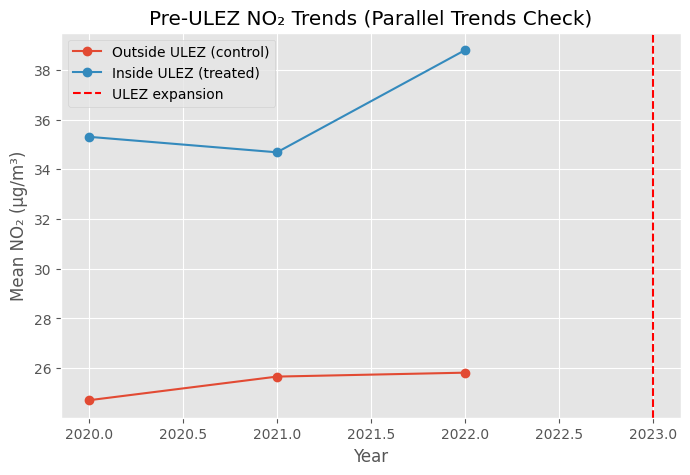

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for treated, g in pre_trends.groupby('treated'):
    label = 'Inside ULEZ (treated)' if treated == 1 else 'Outside ULEZ (control)'
    plt.plot(g['year'], g['Value'], marker='o', label=label)

plt.axvline(2023, color='red', linestyle='--', label='ULEZ expansion')
plt.xlabel('Year')
plt.ylabel('Mean NO₂ (µg/m³)')
plt.title('Pre-ULEZ NO₂ Trends (Parallel Trends Check)')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import statsmodels.formula.api as smf

did_model = smf.ols(
    'Value ~ treated + post + treated:post',
    data=yearly
).fit(cov_type='HC1')

print(did_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.298
Date:                Sat, 10 Jan 2026   Prob (F-statistic):             0.0946
Time:                        18:29:08   Log-Likelihood:                -156.05
No. Observations:                  39   AIC:                             320.1
Df Residuals:                      35   BIC:                             326.8
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       25.3958      3.158      8.041   